# Task 4 - Regression

## Data Source

  * The data source is the file `LifeExpectancyData.csv` (original available here: [Life Expectancy Data](https://www.kaggle.com/kumarajarshi/life-expectancy-who)).
  * You can find the description of the dataset on the provided page with the original dataset.
  * The target (dependent) variable is named `Life expectancy`.

## Instructions for Processing

  * Remove from the dataset data points for which the dependent variable is unknown.
  * Divide the data into suitable subsets that will serve you for training, model comparison, and subsequent prediction of the performance of the final model.
  * Conduct a basic data exploration and discuss your observations. Based on it, properly address problematic aspects in the data (missing values, etc.) and explain the motivation behind the steps taken.
  * Apply linear and ridge regression and properly evaluate the results:
      * Use MAE (mean absolute error) and RMSE (root mean squared error) for error measurement.

  * Investigate how you could improve the models:
      * Experiment with creating new features (based on the available ones).
      * Experiment with data standardization/normalization.
      * Choose hyperparameters of the models for tuning and find their best values.
      * Always provide thorough comments on the obtained results.
    
  * Use other models (at least one).
  * Finally, select the best model (based on RMSE) and estimate the RMSE and MAE you can expect on new data that you did not have access to before.

### Let's start

In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

np.set_printoptions(precision=5, suppress=True)

In [2]:
data = pd.read_csv("LifeExpectancyData.csv")

#### Analyzing and preparing the data and after that splitting them up into train, validation and test data

In [3]:
display(data.shape)
display(data.info())
display(data.nunique())
display(data.head())

(2938, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

None

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


First of all, we have null values in the column **Life Expectancy**, which we are going to predict. We don't need these values for model creating or model testing, so we `remove` the rows with them.

In [4]:
to_drop = data.index[data["Life expectancy "].isna()].tolist()
data.drop(to_drop, inplace=True)

remaining_missing_rows = data[data["Life expectancy "].isna()].shape[0]
print("Remaining rows with missing values in 'Life expectancy':", remaining_missing_rows)

Remaining rows with missing values in 'Life expectancy': 0


While dropping rows in the last cell, I noticed that many feature names have extra spaces, no logic in the spelling of large/small letters. So let's `rename` them.

The column **Income composition of resources** is too long, so we'll rename it to **HDI** ( from the dataset description it makes sense ). Column **thinness  1-19 years** describes actually **Thinness 10-19 years**, so we rename it too.

In [5]:
data.rename(columns = { 'Life expectancy ':'Life Expectancy', 'percentage expenditure':'Percentage Expenditure', 
                        'infant deaths':'Infant Deaths', 'Measles ':'Measles', ' BMI ':'BMI', 
                        'under-five deaths ':'Under-five Deaths', 'Diphtheria ' : 'Diphtheria',
                        ' HIV/AIDS':'HIV/AIDS', ' thinness  1-19 years':'Thinness 10-19 years', 
                        ' thinness 5-9 years':'Thinness 5-9 years', 'Total expenditure':'Total Expenditure',
                        'Income composition of resources':'HDI'}, inplace=True)

Also remove possible `duplicates` in the table.

In [6]:
data.drop_duplicates(inplace=True)
data.shape

(2928, 22)

In [7]:
Xdata = data.drop("Life Expectancy", axis=1)
ydata = data["Life Expectancy"]

Creating a function, that will prepare the dataset.

Conversion of data type *object* to data type *bool* for column **Status** and to data type *category* for column **Country**.

There is also an option to use `one-hot encoding` for column **Country**.

At the end, the function `splits our data` into three subsets for model training, hyperparameter selection and testing our model.

In [8]:
from sklearn.model_selection import train_test_split

def prepare_dataset(Xdata, ydata, one_hot=False):
    Xdata["Status"] = (Xdata["Status"] == "Developed")
    Xdata["Country"] = Xdata["Country"].astype('category').cat.codes
    rd_seed = 143

    if one_hot:
        Xdata = pd.get_dummies(Xdata, columns=["Country"])

    Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.2, random_state=rd_seed)
    Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.225, random_state=rd_seed)

    display(Xtrain.shape)
    display(ytrain.shape)
    display(Xval.shape)
    display(yval.shape)
    display(Xtest.shape)
    display(ytest.shape)

    return Xtrain, ytrain, Xval, yval, Xtest, ytest

In [10]:
Xtrain, ytrain, Xval, yval, Xtest, ytest = prepare_dataset(Xdata, ydata)

(1815, 21)

(1815,)

(527, 21)

(527,)

(586, 21)

(586,)

Do a `statistical analysis` of the training data.

In [11]:
display(Xtrain.describe())
display(ytrain.describe())

,Country,Year,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,HDI,Schooling
count,1815.000000,1815.000000,1815.000000,1815.000000,1693.000000,1815.000000,1478.000000,1815.000000,1795.000000,1815.000000,1800.000000,1674.000000,1800.000000,1815.000000,1561.000000,1.427000e+03,1795.000000,1795.000000,1725.000000,1725.000000
mean,91.523416,2007.431956,163.109091,30.558678,4.696072,740.114764,80.876861,2484.256749,38.694708,42.303030,82.875000,5.927730,82.287778,1.657906,7509.093349,1.197872e+07,4.801504,4.839387,0.629621,12.049159
std,52.478687,4.640870,121.808217,121.929742,4.082960,1988.558963,25.072158,11335.850397,19.816199,165.283041,23.016765,2.455589,23.862457,4.640178,14265.368962,5.260172e+07,4.373943,4.495229,0.209983,3.296536
min,0.000000,2000.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,0.650000,2.000000,0.100000,1.681350,4.300000e+01,0.100000,0.100000,0.000000,0.000000
25%,47.000000,2003.000000,74.000000,0.000000,0.920000,5.946027,77.000000,0.000000,19.600000,0.000000,78.000000,4.282500,78.000000,0.100000,474.819788,2.326845e+05,1.600000,1.600000,0.495000,10.200000
50%,92.000000,2007.000000,143.000000,3.000000,3.870000,67.333787,92.000000,17.000000,44.200000,4.000000,93.000000,5.725000,93.000000,0.100000,1855.939150,1.384969e+06,3.400000,3.400000,0.678000,12.400000
75%,137.000000,2011.000000,224.500000,22.000000,8.010000,461.789740,96.000000,354.500000,56.200000,28.500000,97.000000,7.530000,97.000000,0.700000,6283.245220,7.709584e+06,7.000000,7.000000,0.782000,14.200000
max,182.000000,2015.000000,723.000000,1800.000000,17.310000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


count    1815.000000
mean       69.347493
std         9.388347
min        36.300000
25%        63.200000
50%        72.200000
75%        75.600000
max        89.000000
Name: Life Expectancy, dtype: float64

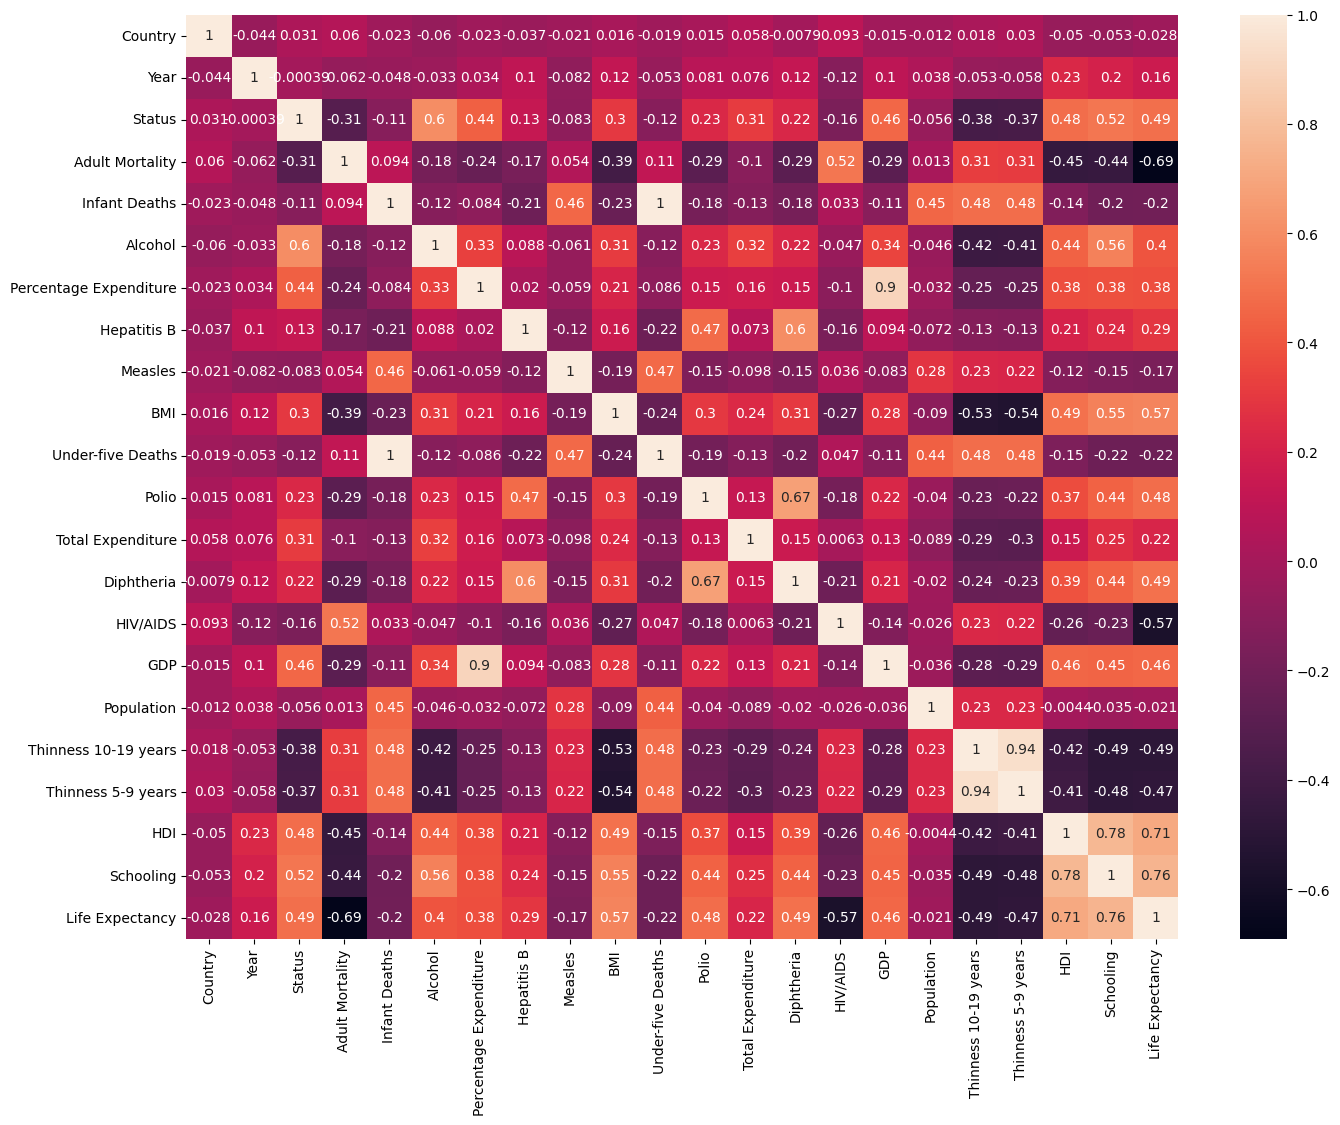

In [12]:
datacorr = pd.concat([Xtrain, ytrain], axis=1).corr()
plt.figure(figsize=(16, 12))
sns.heatmap(datacorr, annot=True)
plt.show()

We received a lot of interesting information after doing statistical analysis. For example, column **Population** has a very `large variance`, and it is also `weakly correlated` with column **Life Expectancy**, which we try to predict. This means that it does not make much sense to use this column when training the model. The column **HDI** has a `small variance`, which means that it is close to `constant` column.

Columns **Infant Deaths** and **Under-five Deaths**, **Percentage Expenditure** and **GDP**, **Thinness 10-19 years** and **Thinness 5-9 years** are also `highly correlated` with each other. The graphs below perfectly illustrate these relationships.


In [15]:
def draw_corr_columns(data, x, y):
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.grid(axis='x', color='black', linewidth=0.5)
    ax.grid(axis='y', color='black', linewidth=0.5)
    ax.scatter(data[x], data[y], s=100, c='royalblue', label=f'{x} vs {y}')
    ax.set_title(f'Scatter Plot: {x} vs {y}')

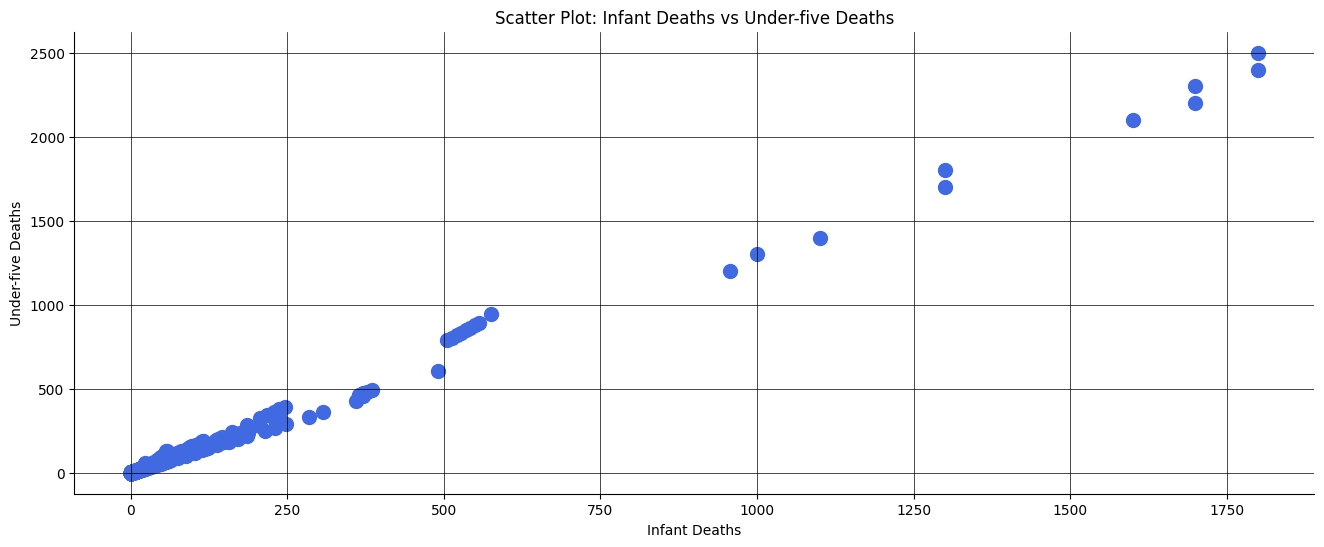

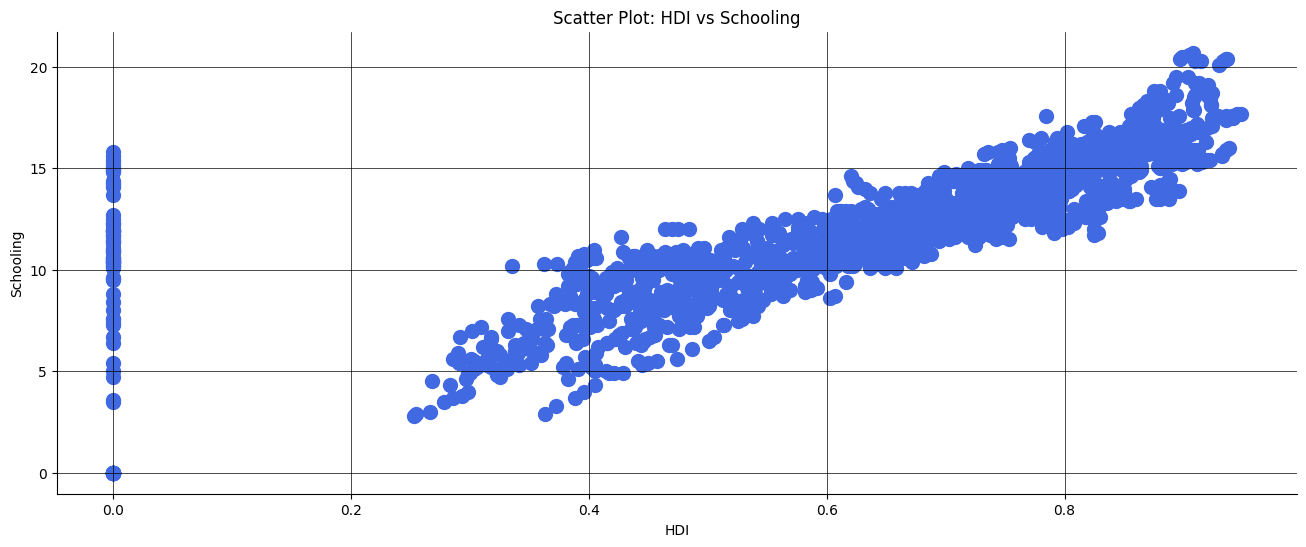

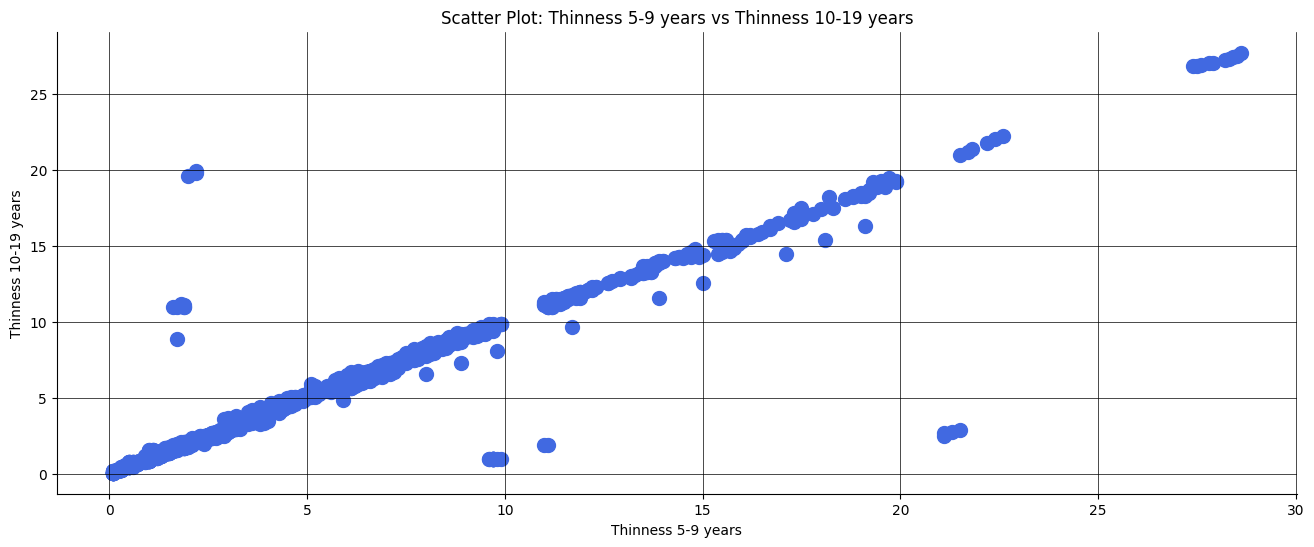

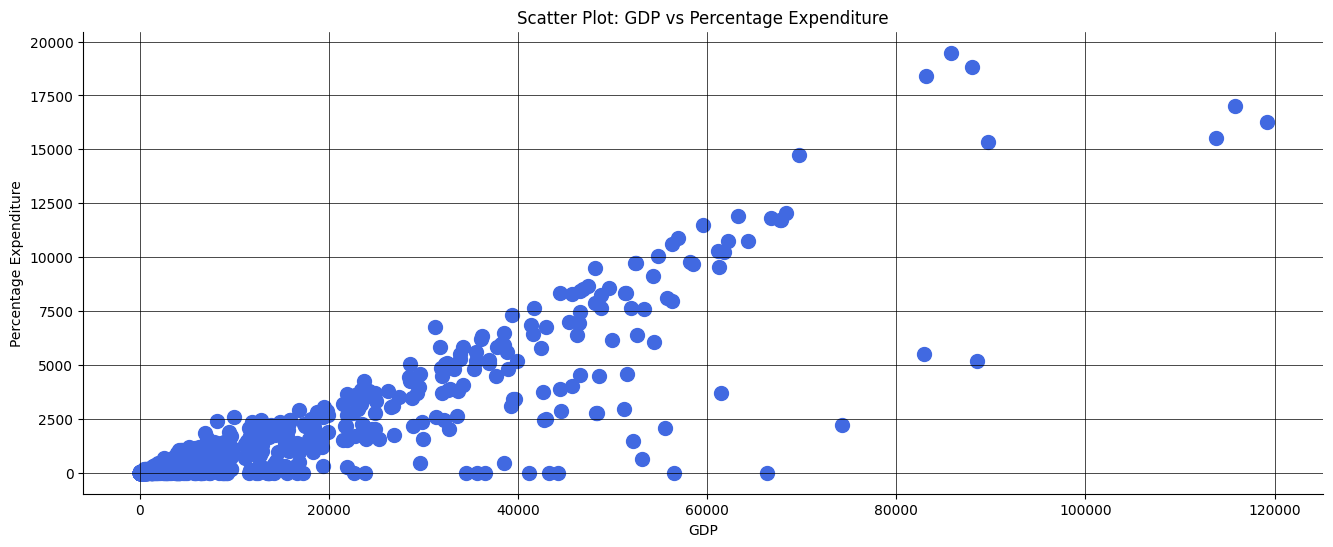

In [16]:
draw_corr_columns(Xtrain, "Infant Deaths", "Under-five Deaths")
draw_corr_columns(Xtrain, "HDI", "Schooling")
draw_corr_columns(Xtrain, "Thinness 5-9 years", "Thinness 10-19 years")
draw_corr_columns(Xtrain, "GDP", "Percentage Expenditure")

These highly correlated columns may be the reason for the `colinearity` of the training dataset in the future, which will not allow us to create a proper linear regression model. Let's take note of this fact.

Replace all null values with `-1` ( the number that is not in the table ).

In [17]:
Xtrain = Xtrain.fillna(-1)
Xval = Xval.fillna(-1)
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1815 entries, 205 to 2480
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 1815 non-null   int16  
 1   Year                    1815 non-null   int64  
 2   Status                  1815 non-null   bool   
 3   Adult Mortality         1815 non-null   float64
 4   Infant Deaths           1815 non-null   int64  
 5   Alcohol                 1815 non-null   float64
 6   Percentage Expenditure  1815 non-null   float64
 7   Hepatitis B             1815 non-null   float64
 8   Measles                 1815 non-null   int64  
 9   BMI                     1815 non-null   float64
 10  Under-five Deaths       1815 non-null   int64  
 11  Polio                   1815 non-null   float64
 12  Total Expenditure       1815 non-null   float64
 13  Diphtheria              1815 non-null   float64
 14  HIV/AIDS                1815 non-null   flo

#### Let's train a machine learning models

Ridge regression built on non-normalised data can throw up warnings. So let's ignore them.

In [18]:
import warnings
warnings.filterwarnings("ignore")

At the beginning we will create models without additional data optimisation. We will start with `linear regression`.

In [26]:
def linear_regression(Xtrain, ytrain, Xval, yval, to_print=True):
    reg = LinearRegression()
    reg.fit(Xtrain, ytrain)

    if to_print:
        print("Coefficients:")
        print(reg.coef_)
        print("Intercept:")
        print(reg.intercept_)

    y_pred = reg.predict(Xval)
    plt.scatter(yval, y_pred)
    plt.plot([20, 100], [20, 100], 'r')
    plt.xlabel("Actual Value")
    plt.ylabel("Predicted Value")
    plt.title("Linear Regression")
    plt.show()

    rmse = mean_squared_error(np.array(yval), y_pred, squared=False)
    mae = mean_absolute_error(np.array(yval), y_pred)

    print('RMSE:', rmse)
    print('MAE:', mae)

    return reg

Coefficients:
[ 0.00769  0.04802  2.6167  -0.02073  0.1211   0.15111 -0.00008  0.00744
 -0.00002  0.05892 -0.08919  0.02734  0.00049  0.02481 -0.52682  0.00008
 -0.      -0.18819  0.04991 -3.26339  0.68151]
Intercept:
-37.283682815356684


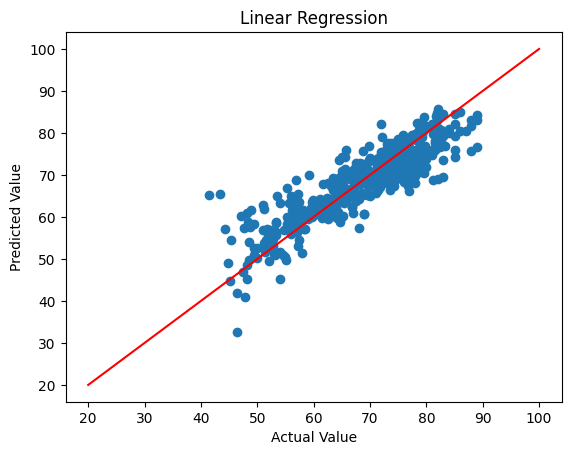

RMSE: 4.550267068272613
MAE: 3.3691785243598122


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
reg = linear_regression(Xtrain, ytrain, Xval, yval)

In [23]:
XX = np.matrix(np.concatenate([np.ones((Xtrain.shape[0], 1)), np.array(Xtrain)], axis=1))
YY = np.matrix(ytrain).T

w_hat = np.zeros((Xtrain.shape[1] + 1,))
w_hat[0] = reg.intercept_
w_hat[1:] = reg.coef_

w_hat = np.matrix(w_hat.reshape(-1, 1))

print('\nVerification of the normal equation for solving Linear Regression:')
verification_result = XX.T * XX * w_hat - XX.T * YY

formatted_result = ["{:0.5f}".format(x) for x in np.ravel(verification_result)]
print(formatted_result)


Verification of the normal equation for solving Linear Regression:
['-0.00000', '-0.00000', '-0.00000', '-0.00000', '0.00000', '-0.00002', '-0.00000', '-0.00002', '0.00000', '-0.00094', '0.00000', '-0.00003', '-0.00000', '0.00000', '-0.00000', '0.00000', '-0.00006', '1.36108', '-0.00000', '-0.00000', '0.00000', '0.00000']


The last cell confirms our assumption that the columns may be `collinear` ( for non-collinear columns all values must be zero ). This causes `model degradation`.

Now use the `ridge regression` method.

In [31]:
def ridge_regression(Xtrain, ytrain, Xval, yval, alpha, to_print=True):
    rid_reg = Ridge(alpha)
    rid_reg.fit(Xtrain, ytrain)

    if to_print:
        print("Coefficients:")
        print(rid_reg.coef_)
        print("Intercept:")
        print(rid_reg.intercept_)

    y_pred = rid_reg.predict(Xval)
    plt.scatter(yval, y_pred)
    plt.plot([20, 100], [20, 100], 'r')
    plt.xlabel("Actual Value")
    plt.ylabel("Predicted Value")
    plt.title("Ridge Regression")
    plt.show()
    
    rmse = mean_squared_error(np.array(yval), y_pred, squared=False)
    mae = mean_absolute_error(np.array(yval), y_pred)
    
    print('RMSE:', rmse)
    print('MAE:', mae)

    return rid_reg

Coefficients:
[ 0.00771  0.04826  2.60131 -0.02073  0.12115  0.15241 -0.00008  0.00741
 -0.00002  0.059   -0.08923  0.02741  0.00046  0.02483 -0.52684  0.00008
 -0.      -0.18805  0.04956 -3.21427  0.67698]
Intercept:
-37.74614453234224


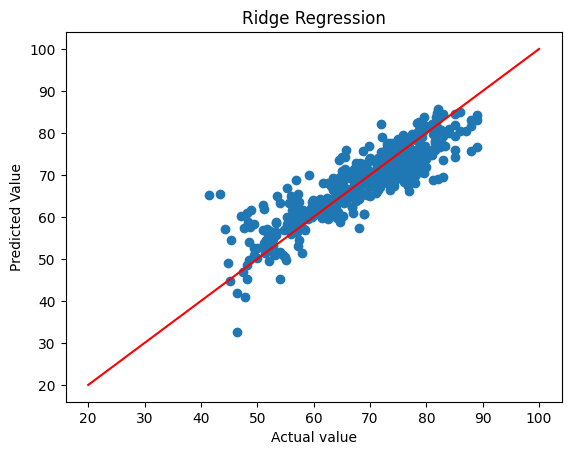

RMSE: 4.551108449874523
MAE: 3.369335719997262

Verification of the normal equation for solving Linear Regression:
['0.00000', '0.00000', '-0.00000', '-0.00000', '0.00000', '-0.00000', '-0.00000', '0.00000', '-0.00000', '0.00000', '-0.00000', '-0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '-0.00000', '-0.00024', '0.00000', '-0.00000', '0.00000', '-0.00000']


In [33]:
from sklearn.linear_model import Ridge
alpha = 1.0
rid_reg = ridge_regression(Xtrain, ytrain, Xval, yval, alpha)

w_hat = np.zeros((Xtrain.shape[1] + 1,))
w_hat[0] = rid_reg.intercept_
w_hat[1:] = rid_reg.coef_

w_hat = np.matrix(w_hat.reshape(-1, 1))

II = np.eye(XX.shape[1], XX.shape[1])
II[0, 0] = 0

print('\nVerification of the normal equation for solving Linear Regression:')
verification_result = XX.T * XX * w_hat - XX.T * YY + alpha * II * w_hat

formatted_result = ["{:0.5f}".format(x) for x in np.ravel(verification_result)]
print(formatted_result)

Using the `validation data`, let's try to find the optimal `lambda` ( `alpha` in our case ) and build the model depending on it.

In [34]:
def opt_ridge_regression(Xtrain, ytrain, Xval, yval, to_print=True):
    def ridge_fit(alpha):
        tmp_rid_reg = Ridge(alpha=alpha)
        tmp_rid_reg.fit(Xtrain, ytrain)
        return mean_squared_error(yval, tmp_rid_reg.predict(Xval), squared=False)

    alphas = np.linspace(1, 500, 100)
    res = [ridge_fit(alpha) for alpha in alphas]
    plt.plot(alphas, res, '.')
    plt.show()

    opt_alpha = optimize.minimize_scalar(ridge_fit, options={'maxiter': 40}, method='bounded', bounds=(0.1, 400))
    print('Optimal alpha:\n ', opt_alpha)

    return ridge_regression(Xtrain, ytrain, Xval, yval, opt_alpha.x, to_print)

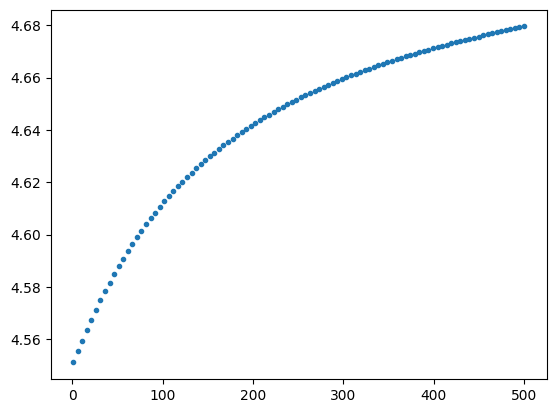

Optimal alpha:
   message: Solution found.
 success: True
  status: 0
     fun: 4.550351181539908
       x: 0.10000406819977517
     nit: 38
    nfev: 38
Coefficients:
[ 0.0077   0.04805  2.61515 -0.02073  0.12111  0.15125 -0.00008  0.00743
 -0.00002  0.05893 -0.08919  0.02735  0.00049  0.02481 -0.52682  0.00008
 -0.      -0.18818  0.04987 -3.25841  0.68105]
Intercept:
-37.33040682514054


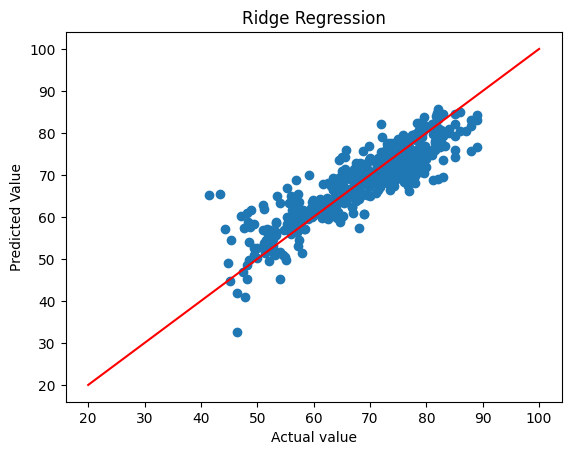

RMSE: 4.550351181539908
MAE: 3.3691944557055016


In [35]:
from scipy import optimize
opt_rid_reg = opt_ridge_regression ( Xtrain, ytrain, Xval, yval )

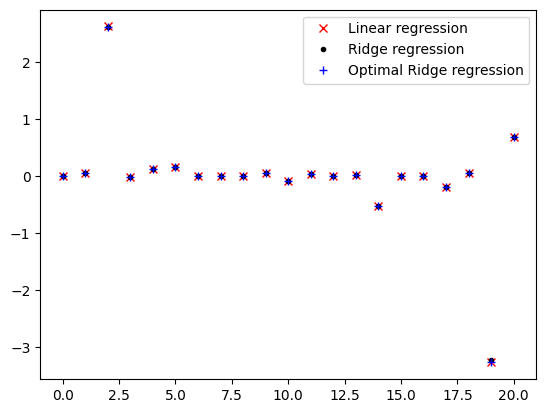

In [37]:
plt.plot(reg.coef_, 'rx', label="Linear regression")
plt.plot(rid_reg.coef_, 'k.', label="Ridge regression")
plt.plot(opt_rid_reg.coef_, 'b+', label="Optimal Ridge regression")
plt.legend()
plt.show()

We can notice that the `coefficients` in the different regressions are almost the `same`, which means that the `ridge regression` does not work as it should ( let's fix it by `optimizing` the dataset and data `normalization` ).

Let's try to use `ridge regression` method after data `normalization`.

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtrain_scaled = scaler.fit_transform(Xtrain)
Xval_scaled = scaler.transform(Xval)

Coefficients:
[  0.39451   0.21809   1.00922  -2.54875  12.12398   0.6016   -0.15234
   0.29442  -0.19511   1.19657 -12.10782   0.6748    0.00551   0.64571
  -2.45512   1.02582  -0.02921  -0.85357   0.26071  -1.34102   2.93346]
Intercept:
69.34749311294766


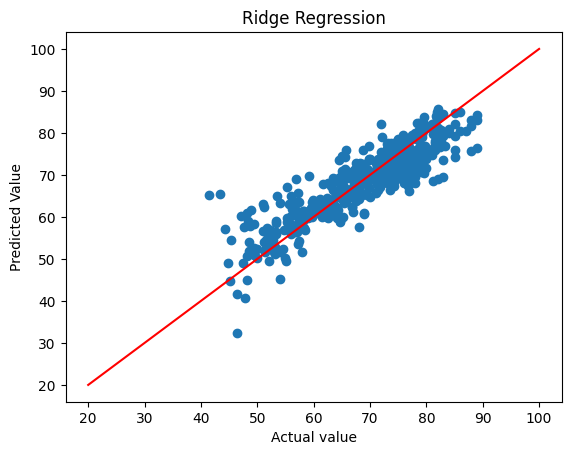

RMSE: 4.565571402025239
MAE: 3.378288138359476

Verification of the normal equation for solving Linear Regression:
['-0.00000', '-0.00000', '-0.00000', '-0.00000', '0.00000', '-0.00000', '-0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '-0.00000', '-0.00000', '-0.00000', '0.00000', '-0.00000', '0.00000', '0.00000', '-0.00000', '0.00000']


In [39]:
rid_reg = ridge_regression(Xtrain_scaled, ytrain, Xval_scaled, yval, alpha)

XX = np.matrix(np.concatenate([np.ones((Xtrain_scaled.shape[0], 1)), np.array(Xtrain_scaled)], axis=1))

w_hat = np.zeros((Xtrain_scaled.shape[1] + 1,))
w_hat[0] = rid_reg.intercept_
w_hat[1:] = rid_reg.coef_
w_hat = np.matrix(w_hat.reshape(-1, 1))

print('\nVerification of the normal equation for solving Linear Regression:')
verification_result = XX.T * XX * w_hat - XX.T * YY + alpha * II * w_hat

formatted_result = ["{:0.5f}".format(x) for x in np.ravel(verification_result)]
print(formatted_result)

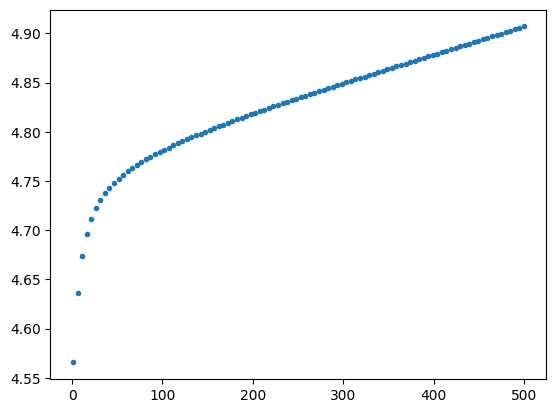

Optimal alpha:
   message: Solution found.
 success: True
  status: 0
     fun: 4.551520779527622
       x: 0.10000406819977517
     nit: 38
    nfev: 38
Coefficients:
[  0.40259   0.22224   1.00608  -2.52706  14.44727   0.62969  -0.16598
   0.29086  -0.18184   1.18744 -14.42358   0.66173   0.00196   0.62158
  -2.44523   1.04293  -0.07536  -0.82963   0.22948  -1.33483   2.9211 ]
Intercept:
69.34749311294766


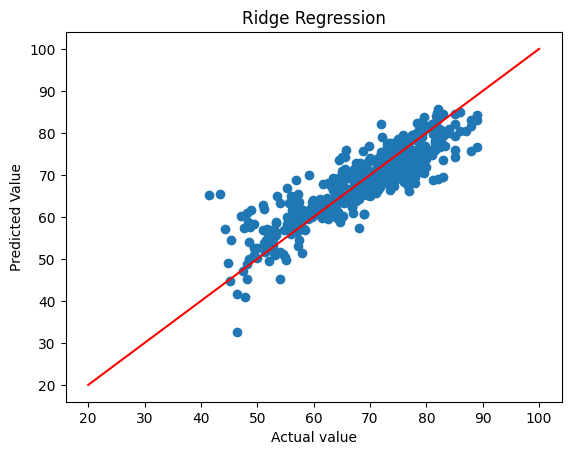

RMSE: 4.551520779527622
MAE: 3.3694786461636017


In [40]:
opt_rid_reg = opt_ridge_regression(Xtrain_scaled, ytrain, Xval_scaled, yval)

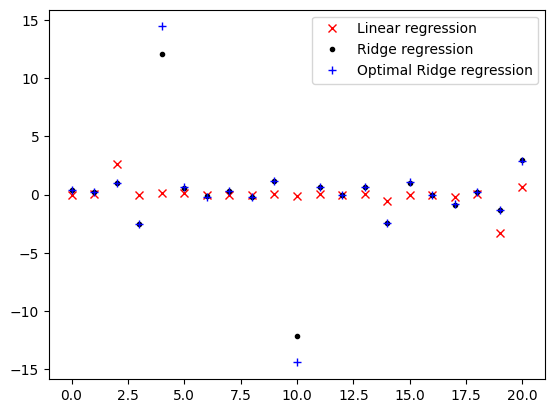

In [41]:
plt.plot(reg.coef_, 'rx', label="Linear regression")
plt.plot(rid_reg.coef_, 'k.', label="Ridge regression")
plt.plot(opt_rid_reg.coef_, 'b+', label="Optimal Ridge regression")
plt.legend()
plt.show()

It's gotten worse, let's normalise our data after it has been optimised.

Now use the `random forests` method. Using the `validation data`, we will select the best `hyperparameteres`.

In [44]:
def random_forest(x_train, y_train, x_val, y_val):
    param_grid = {
        'max_depth': range(1, 8),
        'max_features': range(1, 5)
    }

    param_comb = ParameterGrid(param_grid)
    val_metric = []

    for params in param_comb:
        rfr = RandomForestRegressor(**params, random_state=42).fit(x_train, y_train)
        val_metric.append(mean_squared_error(y_val, rfr.predict(x_val), squared=False))

    best_params = param_comb[np.argmin(val_metric)]
    print(f"We found the best params {best_params}")
    rfr = RandomForestRegressor(**best_params, random_state=42).fit(x_train, y_train)

    y_pred = rfr.predict(x_val)
    plt.scatter(y_val, y_pred)
    plt.plot([20, 100], [20, 100], 'r')
    plt.xlabel("Actual Value")
    plt.ylabel("Predicted Value")
    plt.title("Random Forests")
    plt.show()

    rmse = mean_squared_error(np.array(y_val), y_pred, squared=False)
    mae = mean_absolute_error(np.array(y_val), y_pred)
    
    print('RMSE:', rmse)
    print('MAE:', mae)

    return rfr

We found the best params {'max_features': 4, 'max_depth': 7}


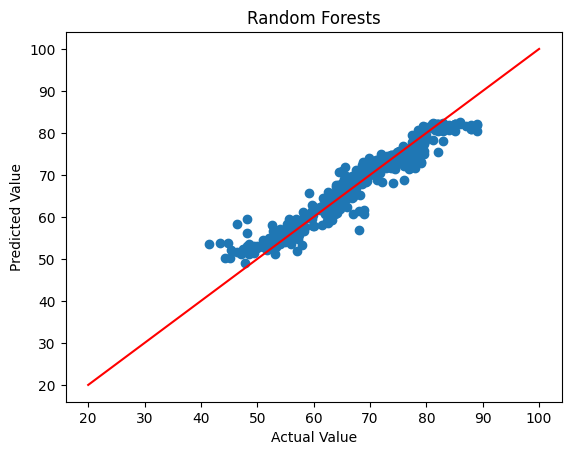

RMSE: 2.65844972604345
MAE: 1.8410050563080398


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
rfr = random_forest(Xtrain, ytrain, Xval, yval)

Random forests method did it better.

#### Optimal data preprocessing

We will drop one of two highly correlated columns in each pair of higly correlated columns. From the columns **Thinness 5-9 years** and **Thinness 10-19 years** create a column **Thinness 5-19 years**. Also we will drop the columns **Population** and **HDI** and make the **Country** feature nominal using `one-hot encoding`.

In [48]:
Xtrain_o, ytrain, Xval_o, yval, Xtest_o, ytest = prepare_dataset(Xdata, ydata, True)

Xtrain_o["Thinness 5-19 years"] = Xtrain_o["Thinness 5-9 years"] + Xtrain_o["Thinness 10-19 years"]
Xtrain_o = Xtrain_o.drop(["Population", "Thinness 5-9 years", "Thinness 10-19 years", "Infant Deaths", "Percentage Expenditure", "HDI"], axis=1)
Xval_o["Thinness 5-19 years"] = Xval_o["Thinness 5-9 years"] + Xval_o["Thinness 10-19 years"]
Xval_o = Xval_o.drop(["Population", "Thinness 5-9 years", "Thinness 10-19 years", "Infant Deaths", "Percentage Expenditure", "HDI"], axis=1)
Xtrain_o = Xtrain_o.fillna(-1)
Xval_o = Xval_o.fillna(-1)

(1815, 203)

(1815,)

(527, 203)

(527,)

(586, 203)

(586,)

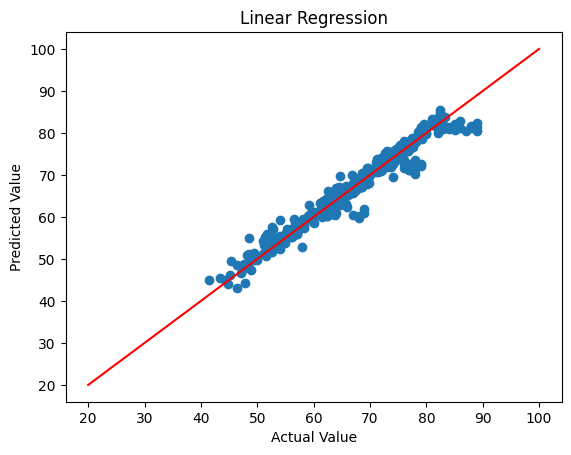

RMSE: 2.009987840863886
MAE: 1.2772788003088145


In [49]:
reg = linear_regression(Xtrain_o, ytrain, Xval_o, yval, False)

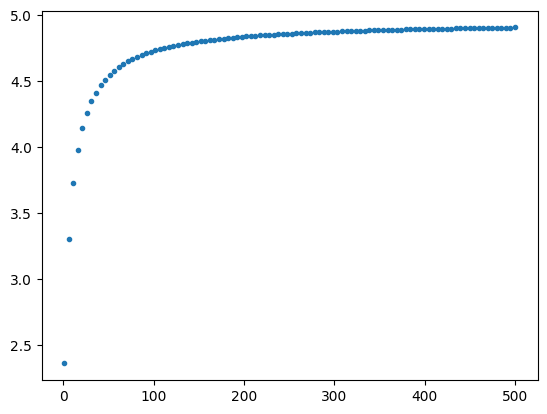

Optimal alpha:
   message: Solution found.
 success: True
  status: 0
     fun: 2.039256170177079
       x: 0.10000406819977517
     nit: 38
    nfev: 38


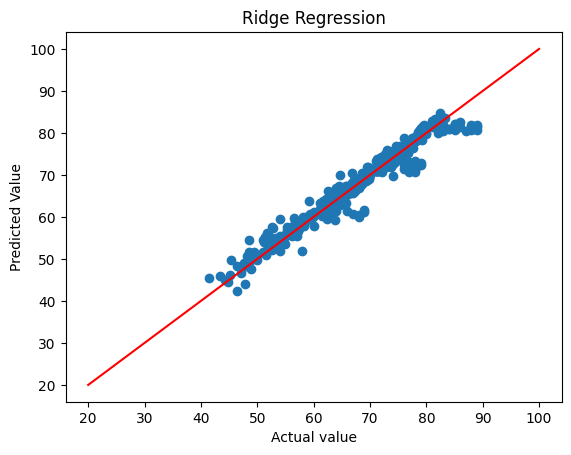

RMSE: 2.039256170177079
MAE: 1.2953309794703634


In [50]:
opt_rid_reg = opt_ridge_regression(Xtrain_o, ytrain, Xval_o, yval, False)

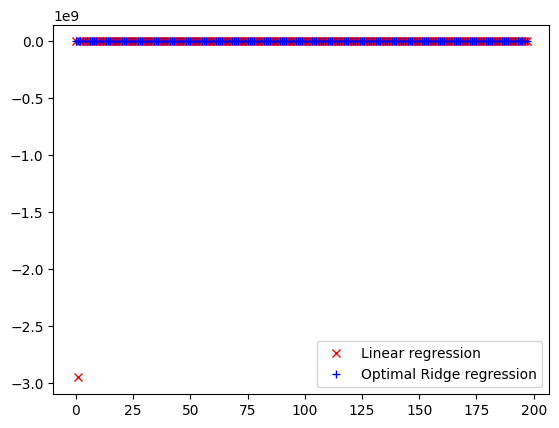

In [51]:
plt.plot(reg.coef_, 'rx', label="Linear regression")
plt.plot(opt_rid_reg.coef_, 'b+', label="Optimal Ridge regression")
plt.legend()
plt.show()

Our regressions are working better and giving `better results`, plus we can now see that the `ridge regression` is working correctly now.

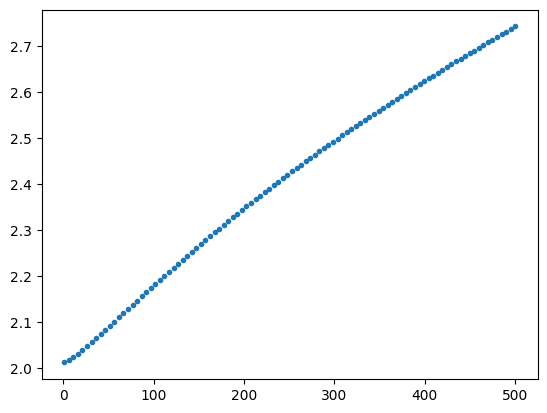

Optimal alpha:
   message: Solution found.
 success: True
  status: 0
     fun: 2.0109692995932362
       x: 0.10000406819977517
     nit: 38
    nfev: 38


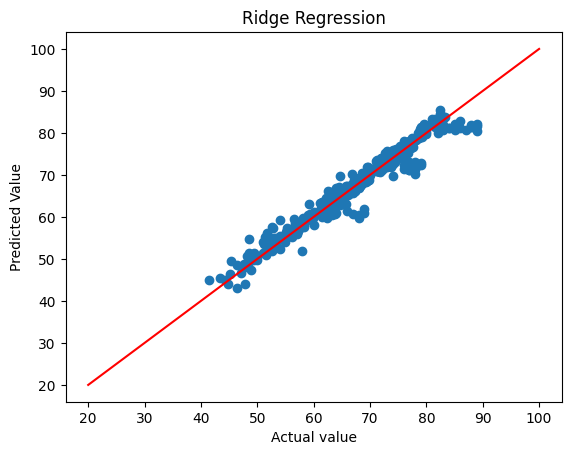

RMSE: 2.0109692995932362
MAE: 1.2751263001601065


In [52]:
scaler = StandardScaler()

Xtrain_scaled_o = scaler.fit_transform(Xtrain_o)
Xval_scaled_o = scaler.transform(Xval_o)

opt_rid_reg = opt_ridge_regression(Xtrain_scaled_o, ytrain, Xval_scaled_o, yval, False)

We found the best params {'max_features': 4, 'max_depth': 7}


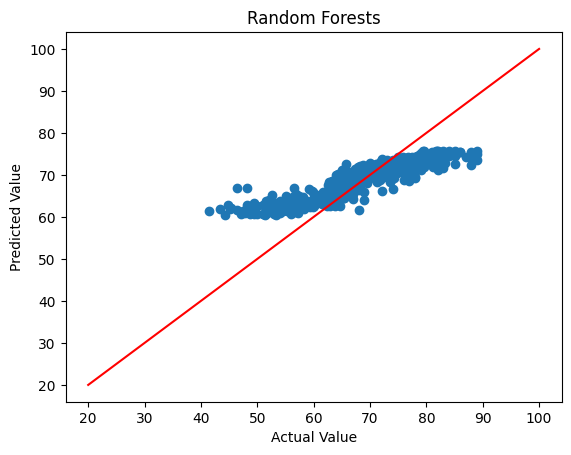

RMSE: 6.069448391194053
MAE: 4.742999308602881


In [53]:
rfr_o = random_forest(Xtrain_o, ytrain, Xval_o, yval)

In the `random forests` case the situation is the opposite: the model has become `worser` due to the `curse of dimensionality` ( we have almost 200 features right now ).

Make the same changes to the dataset as before, but do not use `one-hot encoding`.

In [54]:
Xtrain_rfr = Xtrain.copy()
Xval_rfr = Xval.copy()
Xtest_rfr = Xtest.copy()

Xtrain_rfr["Thinness 5-19 years"] = Xtrain_rfr["Thinness 5-9 years"] + Xtrain_rfr["Thinness 10-19 years"]
Xtrain_rfr = Xtrain_rfr.drop(["Population", "Thinness 5-9 years", "Thinness 10-19 years", "Infant Deaths", "Percentage Expenditure"], axis=1)
Xval_rfr["Thinness 5-19 years"] = Xval_rfr["Thinness 5-9 years"] + Xval_rfr["Thinness 10-19 years"]
Xval_rfr = Xval_rfr.drop(["Population", "Thinness 5-9 years", "Thinness 10-19 years", "Infant Deaths", "Percentage Expenditure"], axis=1)
Xtrain_rfr = Xtrain_rfr.fillna(-1)
Xval_rfr = Xval_rfr.fillna(-1)

We found the best params {'max_features': 4, 'max_depth': 7}


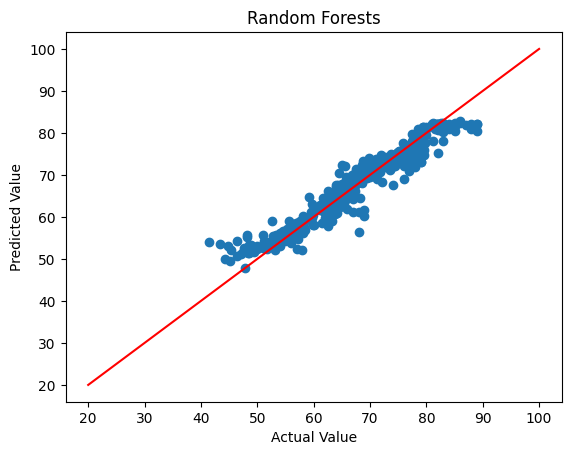

RMSE: 2.5782925172782485
MAE: 1.7801713218013588


In [55]:
rfr_o = random_forest(Xtrain_rfr, ytrain, Xval_rfr, yval)

This method has an RMSE after `extra data preprocessing` almost the same as RMSE before.

As a result, the smallest error on the validation data has the `ridge regression` method with `standard normalisation` and after `extra data preprocessing`. 

Let's use this model to predict **Life Expectancy** in countries based on `test data`. As a result, we will calculate the `final error` of our model.

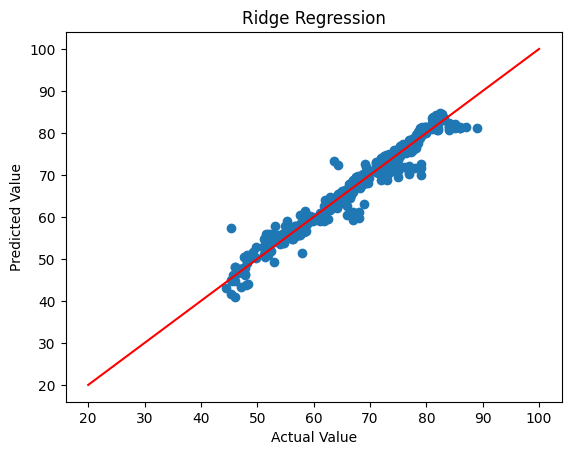

RMSE: 1.9415557053829442
MAE: 1.251910875060902


In [56]:
Xtest_o["Thinness 5-19 years"] = Xtest_o["Thinness 5-9 years"] + Xtest_o["Thinness 10-19 years"]
Xtest_o = Xtest_o.drop(["Population", "Thinness 5-9 years", "Thinness 10-19 years", "Infant Deaths", "Percentage Expenditure", "HDI"], axis=1)
Xtest_o = Xtest_o.fillna(-1)
Xtest_o = scaler.transform(Xtest_o)

y_pred = opt_rid_reg.predict(Xtest_o)
plt.scatter(ytest, y_pred)
plt.plot([20,100], [20,100], 'r')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Ridge Regression")
plt.show() 

rmse = mean_squared_error(np.array(ytest), y_pred, squared=False) 
mae = mean_absolute_error(np.array(ytest), y_pred)

print('RMSE:', rmse)
print('MAE:', mae)

**That's all!**